# Wholesale Customer Data

## Business Scenario

A wholesale distributor supplies products to different types of clients such as:

- Retail stores
- Cafés
- Hotels
- Restaurants

Currently, all customers are treated the same, which leads to:

- Inefficient inventory planning
- Poor marketing strategies
- Missed upselling opportunities

The company wants to **group customers based on their purchasing behavior** to improve decision-making.

-------------------------------------------

### 🔹 Task 1: Data Exploration

- Load the dataset and inspect all available features.
- Identify which columns represent customer purchasing behavior.
- Remove or ignore columns that are not directly related to spending patterns.

* * *

### 🔹 Task 2: Feature Selection

- Select suitable numerical features that can represent customer buying habits.
- Justify your feature selection briefly.

* * *

### 🔹 Task 3: Data Preparation

- Prepare the selected data so that distance-based grouping works correctly.
- Verify that all features contribute fairly to distance calculation.

* * *

### 🔹 Task 4: Clustering Model Construction

- Build a clustering model to group customers into **K segments**.
- Experiment with multiple values of **K**.

* * *

### 🔹 Task 5: Optimal Cluster Identification

- Identify a suitable number of customer groups using an appropriate approach.
- Explain why this value of **K** is reasonable.

* * *

### 🔹 Task 6: Cluster Assignment

- Assign each customer to a cluster.
- Add the cluster label to the dataset.

* * *

### 🔹 Task 7: Cluster Visualization

- Visualize customer clusters using two important spending categories.
- Mark cluster centers clearly in the visualization.

* * *

### 🔹 Task 8: Cluster Profiling

- For each cluster:
    - Calculate average spending per category
    - Identify dominant purchase patterns
- Summarize each cluster in **business-friendly language**.

* * *

### 🔹 Task 9: Business Insight Generation

- Propose one business strategy for each customer segment, such as:
    - Targeted promotions
    - Inventory prioritization
    - Personalized pricing strategies

* * *

### 🔹 Task 10: Stability & Limitations

- Rerun clustering with a different random state.
- Observe whether cluster assignments change.
- Mention one limitation of this clustering approach.
---

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load Dataset

In [89]:
path = '../../Data_Source/Unsupervised_Data_Source/Kaggle/Wholesale customers data.csv'
df = pd.read_csv(path)

# Inspect Data

In [90]:
df.shape

(440, 8)

In [91]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [92]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [93]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [94]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# Feature Selection

In [95]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [96]:
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].values

In [97]:
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

# Data Preprocessing

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Construction and Optimal K

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

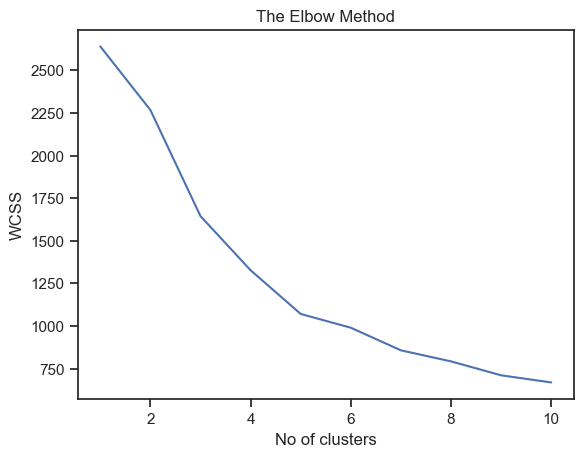

In [99]:
# WCSS calculation
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot K value
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [104]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [105]:
y_kmeans

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Visualization

In [106]:
df['Cluster'] = y_kmeans

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

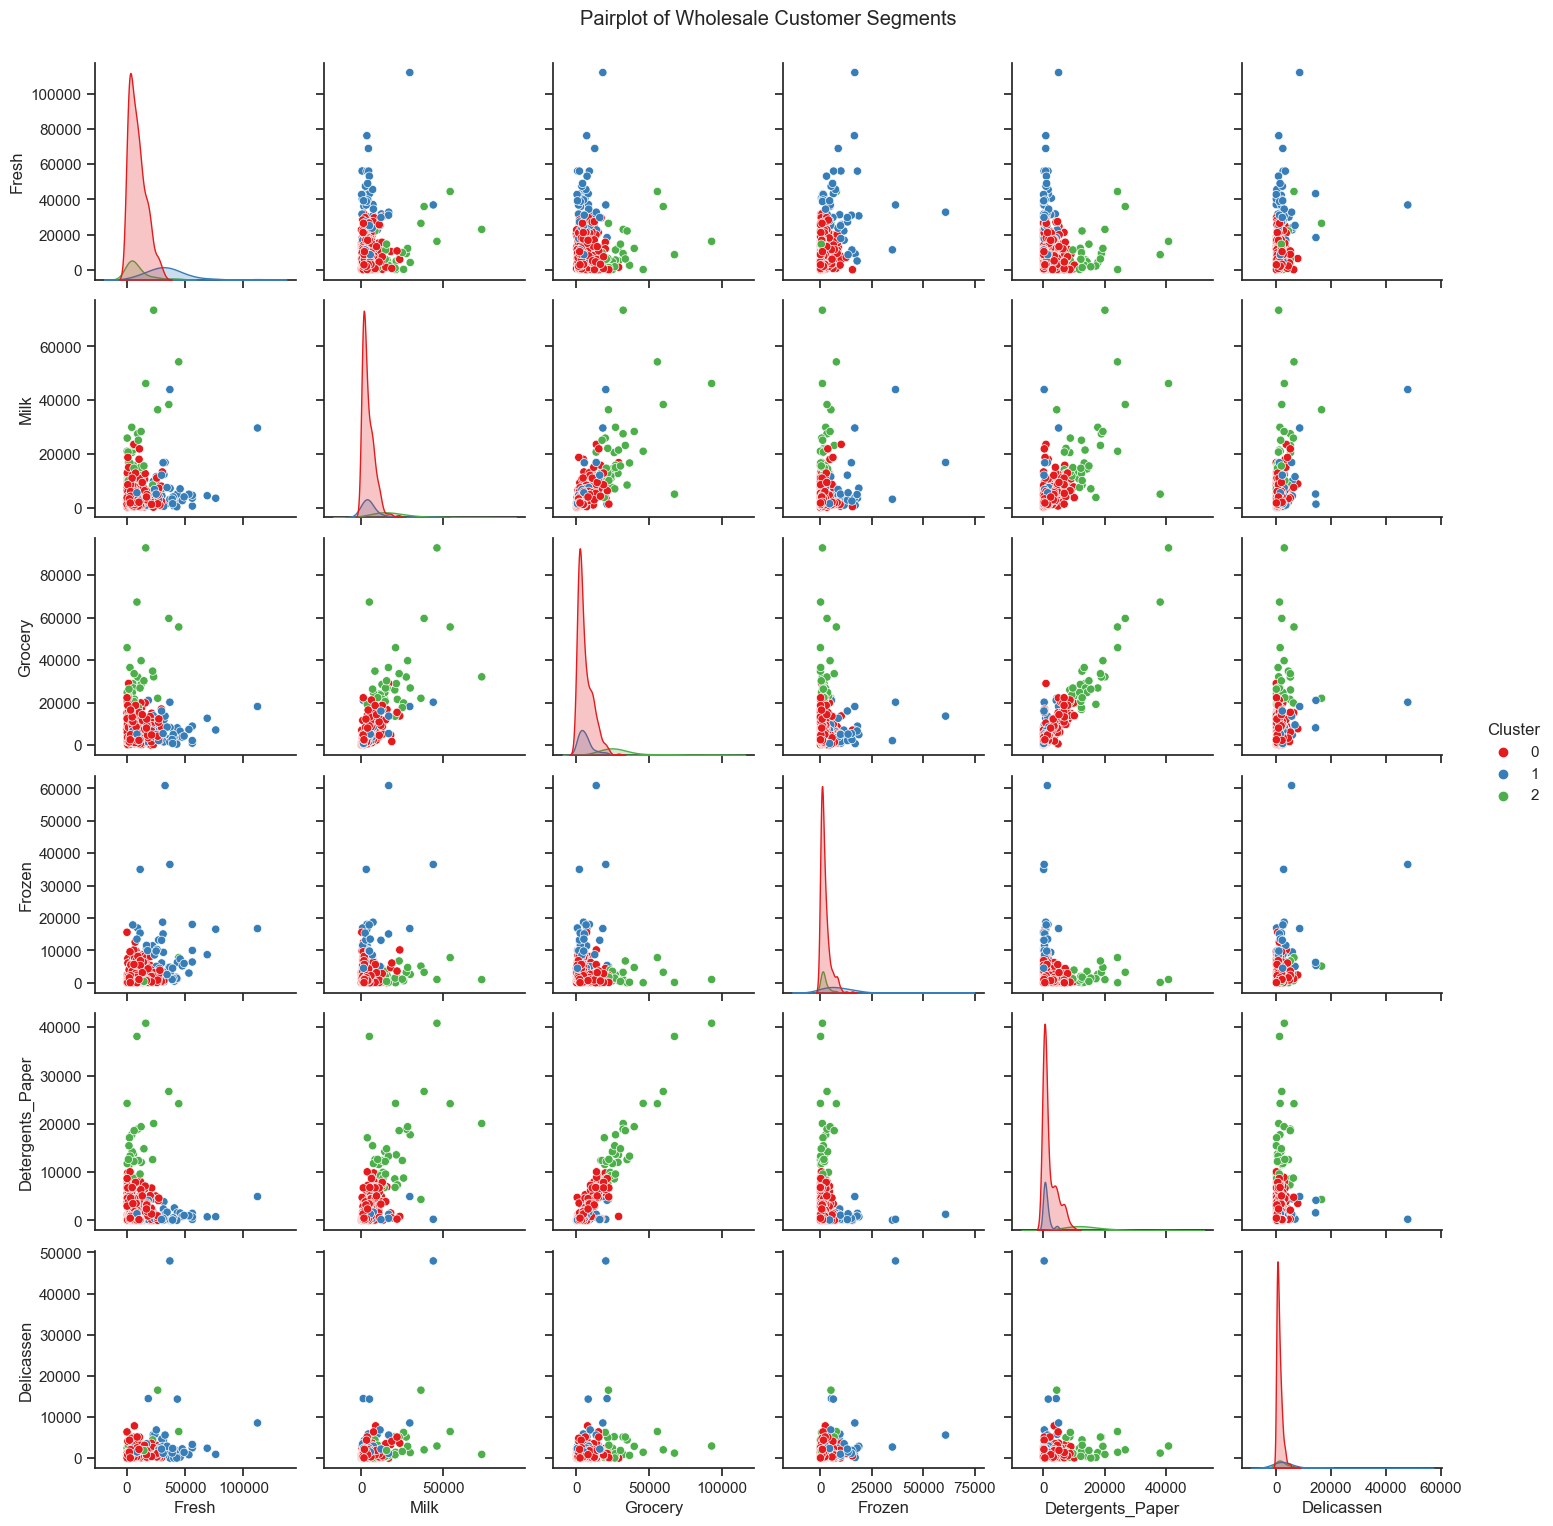

In [107]:
df['Cluster'] = df['Cluster'].astype(str)

sns.set_theme(style="ticks")
g = sns.pairplot(data=df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Cluster']], hue='Cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Wholesale Customer Segments', y=1.02)
plt.show()

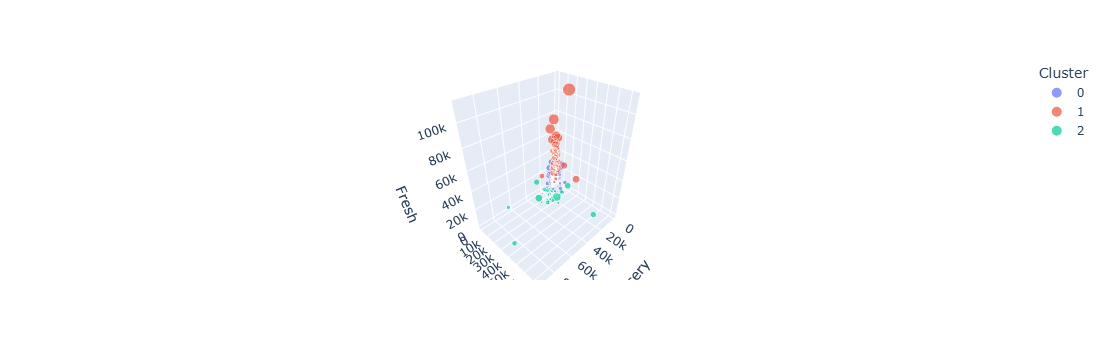

In [111]:
fig = px.scatter_3d(df, x="Grocery", y="Milk", z="Fresh", color='Cluster', size="Fresh")
fig.show()